<a href="https://colab.research.google.com/github/vishnupancharatnala/Rebit/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Fraud Detection and User Spending Behavior Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
cards_df = pd.read_csv('cards_data.csv')
transactions_df = pd.read_csv('transactions_data.csv')
users_df = pd.read_csv('users_data.csv')

import kagglehub

# Download latest version
path1 = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets")

print("Path to dataset files:", path1)

Path to dataset files: /root/.cache/kagglehub/datasets/computingvictor/transactions-fraud-datasets/versions/1


In [4]:
# Find the JSON file within the downloaded directory
json_file = next((f for f in os.listdir(path1) if f.endswith('.json')), None)

# Construct the full path to the JSON file
json_file_path = os.path.join(path1, json_file) if json_file else None

# Check if a JSON file was found
if json_file_path:
    fraud_lables = pd.read_json(json_file_path)

else:
    print("No JSON file found in the downloaded dataset.")


In [5]:
fraud_lables.head()

,target
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No


In [6]:
print(f'No.of rows is {fraud_lables.shape[0]}')
print(f'The no.of null values are {fraud_lables.isnull().sum()}')

No.of rows is 8914963
The no.of null values are target    0
dtype: int64


In [7]:
# fruad_lables has high no.of data,we sample 30 percent of data
# fraud_lables = fraud_lables.sample(frac=0.3)
fraud_lables

,target
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No
...,...
14064699,No
7676538,No
15131030,No
17244732,No


In [8]:
# in the fraud lables first colum has no name , name it has transaction_id and for second column rename as is_fraud
fraud_lables.columns = ['is_fraud']
fraud_lables.columns

# we have first column as transcation_id but it has no name,give name as transaction_id
fraud_lables.index.name = 'transaction_id'
fraud_lables.head()

,is_fraud
transaction_id,
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No


In [28]:
# make a new data frame from fraud_lables having index of fraud_lables and is_fraud as columns
fraud_lables = fraud_lables.reset_index()
fraud_lables.head()

# fraud_lables.columns

,index,transaction_id,is_fraud
0,0,10649266,No
1,1,23410063,No
2,2,9316588,No
3,3,12478022,No
4,4,9558530,No


In [10]:
# transactions has huge amount of data,so we randomly take some part of data and do the proccesing
# select randomly 30% data from transactions_df
transactions_df = transactions_df.sample(frac=0.3)

In [11]:
cards_df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [12]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [13]:
cards_df.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


In [14]:
# credit_limit is obejct data type ,we have to numeric
# remove dollar sign at starting by converting to str and removing first char

card_df = cards_df.copy()
# card_df.credit_limit = card_df.credit_limit.astype(str)
# card_df.credit_limit = card_df.credit_limit.replace('$', '')
# removing non numeric values
card_df['credit_limit'] = card_df['credit_limit'].str.replace(r'[^\d\.]', '', regex=True)


# create a function to convert str to numerical
def is_numeric_safe(col):
  try:
    return pd.to_numeric(col)
  except ValueError:
    return np.nan

card_df.credit_limit = card_df.credit_limit.apply(is_numeric_safe)
# card_df['credit_limit'] = pd.to_numeric(card_df['credit_limit'], errors='coerce')


card_df.credit_limit.isnull().sum()


0

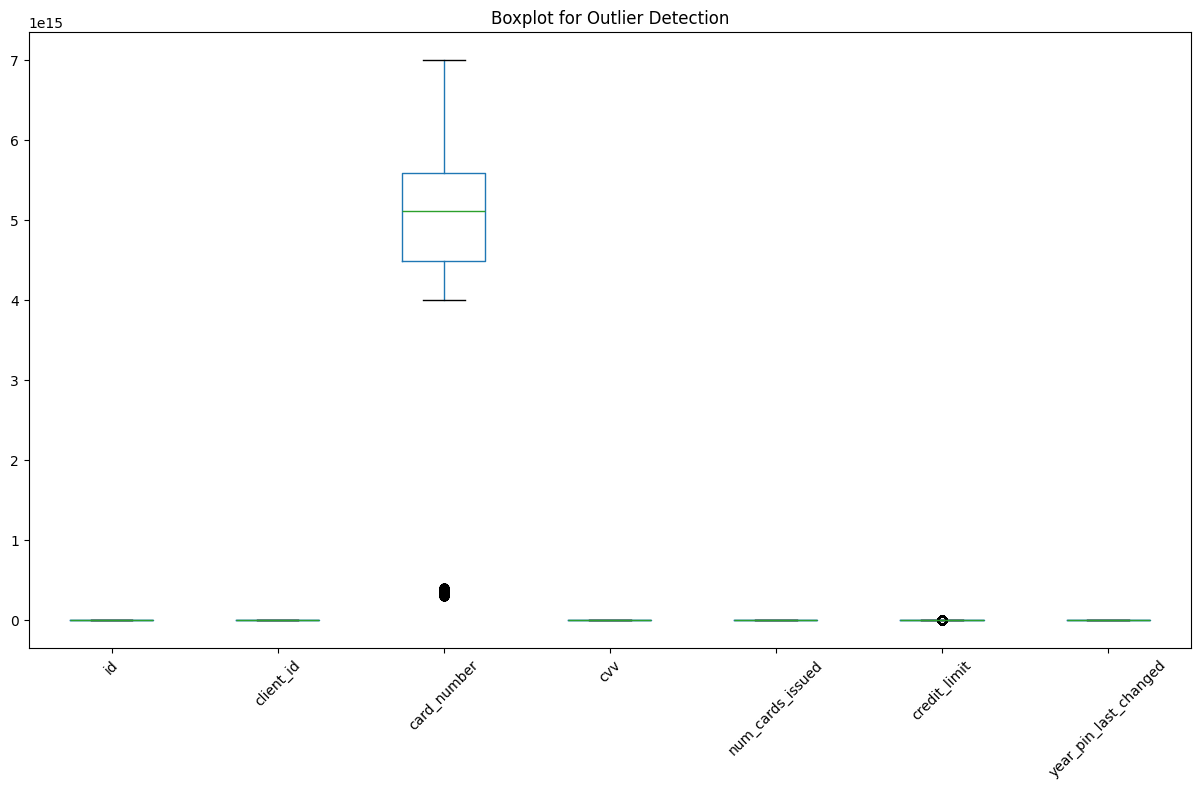

In [15]:
# outliers in card_df
numeric_columns = card_df.select_dtypes(include='number')
numeric_columns.boxplot(figsize=(15, 8), grid=False, rot=45)

# Show the plot
plt.title("Boxplot for Outlier Detection")
plt.show()

card_number are diff and doesn't contain info.so there is no outlier


###Transactions df

In [16]:
transactions_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
4602624,13062260,2013-07-22 18:24:00,1677,324,$48.90,Swipe Transaction,75936.0,Lubbock,TX,79414.0,5814.0,NaN
2159984,10084297,2011-09-18 20:46:00,564,5887,$55.91,Swipe Transaction,75936.0,Auburn,ME,4210.0,5814.0,NaN
1199594,8916425,2010-12-20 09:02:00,1442,2650,$24.78,Swipe Transaction,60569.0,Jerome,ID,83338.0,5300.0,NaN
2154176,10077295,2011-09-17 07:12:00,112,1134,$1.50,Swipe Transaction,86438.0,Carthage,NY,13619.0,5499.0,NaN
1172002,8882888,2010-12-12 10:04:00,737,148,$132.29,Online Transaction,60569.0,ONLINE,NaN,NaN,5300.0,NaN


In [17]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454351 entries, 4602624 to 4788615
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1454351 non-null  int64  
 1   date            1454351 non-null  object 
 2   client_id       1454351 non-null  int64  
 3   card_id         1454351 non-null  int64  
 4   amount          1454351 non-null  object 
 5   use_chip        1454350 non-null  object 
 6   merchant_id     1454350 non-null  float64
 7   merchant_city   1454350 non-null  object 
 8   merchant_state  1292782 non-null  object 
 9   zip             1283514 non-null  float64
 10  mcc             1454350 non-null  float64
 11  errors          22756 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 144.2+ MB


In [18]:
transactions_df.isnull().sum()

,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,1
merchant_id,1
merchant_city,1
merchant_state,161569
zip,170837


In [19]:
# converting date to date format

transactions_df.date = pd.to_datetime(transactions_df.date)


In [20]:
transactions_df.merchant_city.value_counts()

,count
merchant_city,
ONLINE,161568
Houston,16405
Miami,9718
Brooklyn,9230
Los Angeles,8641
...,...
Portales,1
Shawneetown,1
Prophetstown,1


In [21]:
# only taking rows with merchant_city is online means payment using online and merchant_state,zip column
transactions_df.loc[transactions_df['merchant_city']=='ONLINE',['merchant_state','zip']]

,merchant_state,zip
1172002,NaN,NaN
114674,NaN,NaN
4016586,NaN,NaN
840848,NaN,NaN
1290325,NaN,NaN
...,...,...
3436798,NaN,NaN
2545892,NaN,NaN
379964,NaN,NaN
1621851,NaN,NaN


In [22]:
# we have observed that for online transactions merchant_state,zip will be nan
# set merchant_state to online and zip to float value of 000000
transactions_df.loc[transactions_df['merchant_city']=='ONLINE',['merchant_state','zip']] = 'ONLINE',float(000000)
# transactions_df.loc[transactions_df['merchant_city']=='ONLINE',['merchant_state','zip']]
transactions_df.isnull().sum()


,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,1
merchant_id,1
merchant_city,1
merchant_state,1
zip,9269


In [23]:
transactions_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
4602624,13062260,2013-07-22 18:24:00,1677,324,$48.90,Swipe Transaction,75936.0,Lubbock,TX,79414.0,5814.0,NaN
2159984,10084297,2011-09-18 20:46:00,564,5887,$55.91,Swipe Transaction,75936.0,Auburn,ME,4210.0,5814.0,NaN
1199594,8916425,2010-12-20 09:02:00,1442,2650,$24.78,Swipe Transaction,60569.0,Jerome,ID,83338.0,5300.0,NaN
2154176,10077295,2011-09-17 07:12:00,112,1134,$1.50,Swipe Transaction,86438.0,Carthage,NY,13619.0,5499.0,NaN
1172002,8882888,2010-12-12 10:04:00,737,148,$132.29,Online Transaction,60569.0,ONLINE,ONLINE,0.0,5300.0,NaN


In [24]:
transactions_df.isnull().sum()

,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,1
merchant_id,1
merchant_city,1
merchant_state,1
zip,9269


In [33]:
transactions_df.rename(columns={'id':'transaction_id'},inplace=True)
transactions_df.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')

In [34]:
# merge fraud_lables and transactions_df using left on transaction_id
transactions_df = transactions_df.merge(fraud_lables,how='left',on='transaction_id')
transactions_df

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,index,is_fraud
0,13062260,2013-07-22 18:24:00,1677,324,$48.90,Swipe Transaction,75936.0,Lubbock,TX,79414.0,5814.0,NaN,NaN,NaN
1,10084297,2011-09-18 20:46:00,564,5887,$55.91,Swipe Transaction,75936.0,Auburn,ME,4210.0,5814.0,NaN,4941935.0,No
2,8916425,2010-12-20 09:02:00,1442,2650,$24.78,Swipe Transaction,60569.0,Jerome,ID,83338.0,5300.0,NaN,8187958.0,No
3,10077295,2011-09-17 07:12:00,112,1134,$1.50,Swipe Transaction,86438.0,Carthage,NY,13619.0,5499.0,NaN,NaN,NaN
4,8882888,2010-12-12 10:04:00,737,148,$132.29,Online Transaction,60569.0,ONLINE,ONLINE,0.0,5300.0,NaN,6012027.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454346,9155308,2011-02-14 16:32:00,1098,5179,$-98.00,Swipe Transaction,50867.0,Hawarden,IA,51023.0,5541.0,NaN,NaN,NaN
1454347,11295572,2012-06-22 11:38:00,1776,4938,$9.32,Swipe Transaction,75781.0,San Diego,CA,92130.0,5411.0,NaN,7320950.0,No
1454348,9699384,2011-06-22 03:44:00,1367,4643,$0.12,Swipe Transaction,44563.0,Green Bay,WI,54302.0,5812.0,NaN,NaN,NaN
1454349,8261573,2010-07-15 19:13:00,882,3467,$8.36,Swipe Transaction,82981.0,New Albany,OH,43054.0,5912.0,NaN,441306.0,No


In [35]:
transactions_df.isnull().sum()

,0
transaction_id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,1
merchant_id,1
merchant_city,1
merchant_state,1
zip,9269


In [37]:
#transactions_df.drop(columns=['is_fraud_y_x','is_fraud_x','is_fraud_y_y','index_x','is_fraud_y','index_y','errors'],inplace=True)

In [38]:
transactions_df.isnull().sum()

,0
transaction_id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,1
merchant_id,1
merchant_city,1
merchant_state,1
zip,9269


In [39]:
# remove the nan rows
transactions_df.dropna(axis=0,inplace=True)
transactions_df.isnull().sum()

,0
transaction_id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,0
zip,0


In [40]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15076 entries, 79 to 1454287
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  15076 non-null  int64         
 1   date            15076 non-null  datetime64[ns]
 2   client_id       15076 non-null  int64         
 3   card_id         15076 non-null  int64         
 4   amount          15076 non-null  object        
 5   use_chip        15076 non-null  object        
 6   merchant_id     15076 non-null  float64       
 7   merchant_city   15076 non-null  object        
 8   merchant_state  15076 non-null  object        
 9   zip             15076 non-null  float64       
 10  mcc             15076 non-null  float64       
 11  errors          15076 non-null  object        
 12  index           15076 non-null  float64       
 13  is_fraud        15076 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
me

### Exploratory Data Analysis (EDA)
Insights on Fraud:<br/>
Transactions marked as fraudulent are analyzed for trends.<br/>
Key fraud indicators include time, merchant category, and amounts.

In [41]:
# Fraud distribution
transactions_df['is_fraud'].value_counts()


,count
is_fraud,
No,15030
Yes,46


In [ ]:
import kagglehub

# Download latest version
mcc_code = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets")

print("Path to dataset files:", mcc_code)

In [ ]:
# Analyze fraud by merchant cat
# Analyze fraud by merchant category
import kagglehub
import os

# Download latest version
dataset_path = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets")

print("Path to dataset files:", dataset_path)

# Find the 'mcc_codes.csv' file within the downloaded directory
for root, _, files in os.walk(dataset_path):
    if 'mcc_codes.csv' in files:
        mcc_code_file_path = os.path.join(root, 'mcc_codes.csv')
        break
else:
    mcc_code_file_path = None  # File not found

# Check if the file was found
if mcc_code_file_path:
    # Now read the CSV using the correct path
    mcc_code_df = pd.read_csv(mcc_code_file_path)
    mcc_code_mapping = mcc_code_df.set_index('mcc_code')['mcc_description'].to_dict()

    transactions_df['mcc_description'] = transactions_df['mcc_code'].map(mcc_code_mapping)
else:
    print("mcc_codes.csv not found in the downloaded dataset.")

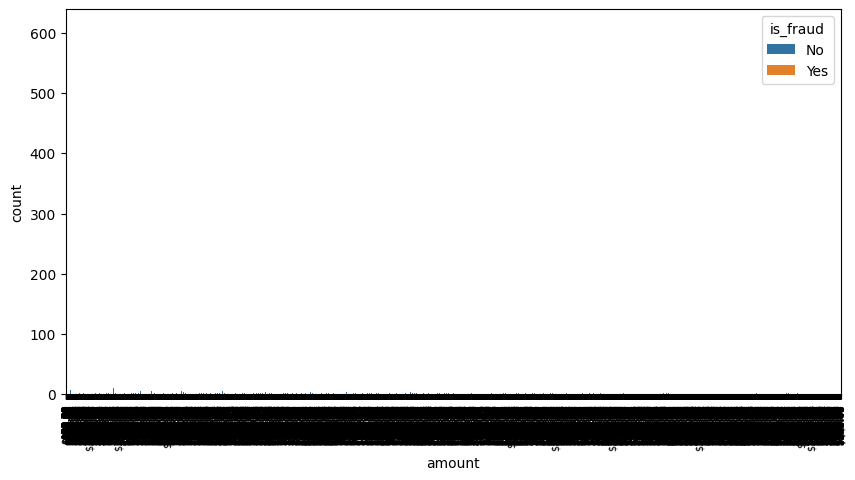

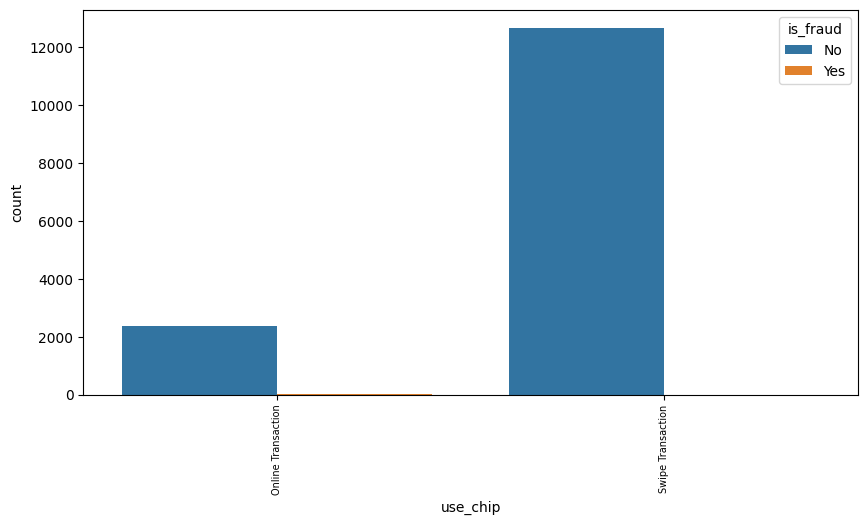

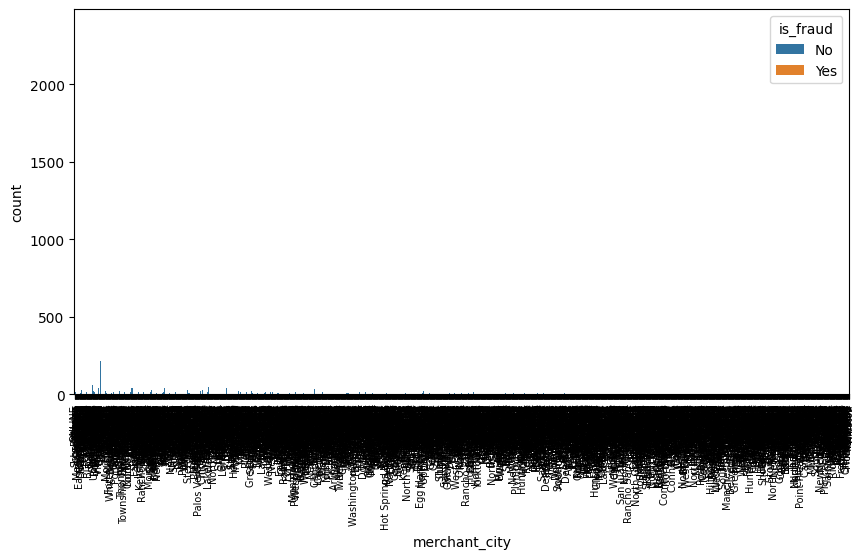

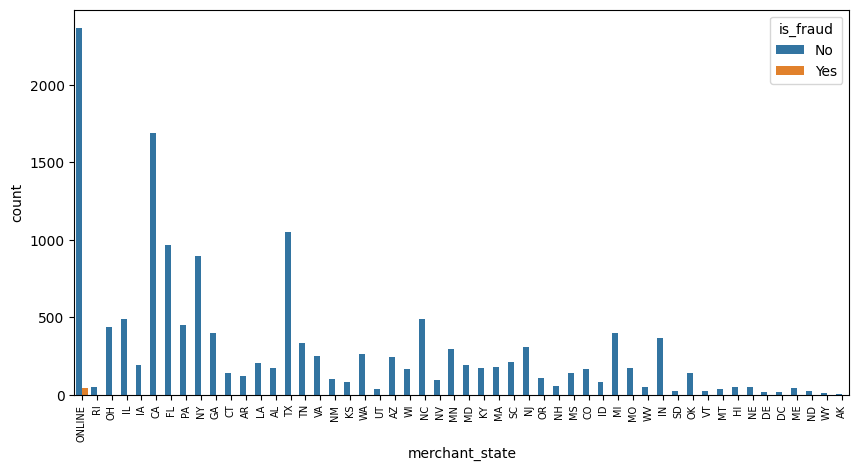

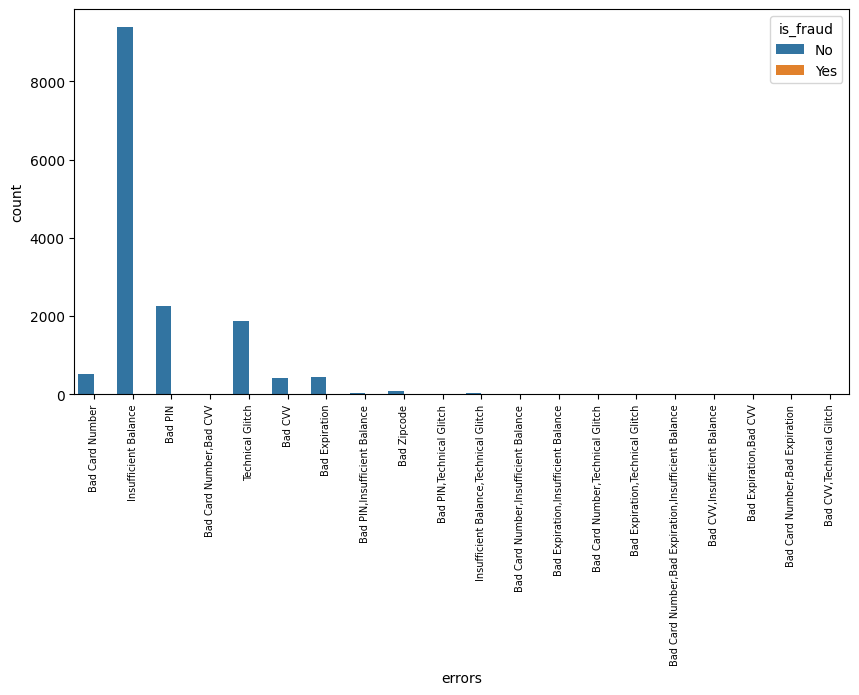

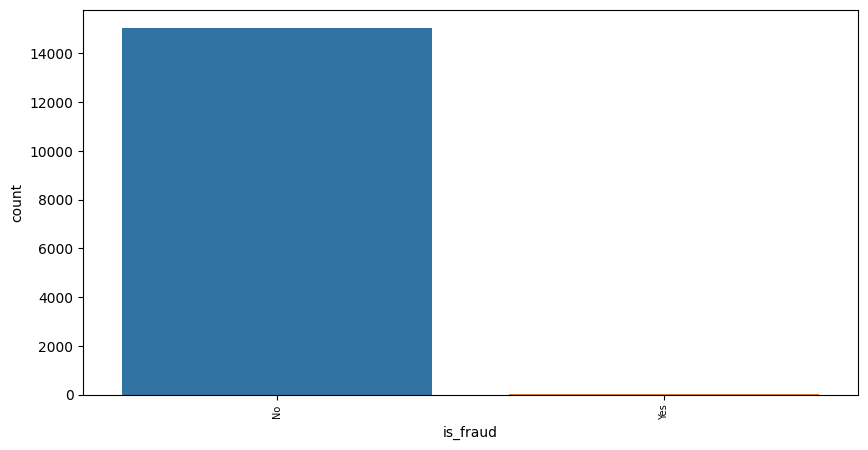

In [43]:
# now we'll see the univariate analysis of transaction data and whether the transaction is fraudlant or not

categorical_col = transactions_df.select_dtypes(include='object').columns
categorical_col
for i in range(len(categorical_col)):
  plt.figure(figsize=(10,5))
  sns.countplot(x=transactions_df[categorical_col[i]],hue=transactions_df['is_fraud'])
  plt.xticks(rotation =90,fontsize =7)

